<a href="https://colab.research.google.com/github/esheehan1/projects/blob/master/UK_Nowcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime


In [52]:
# Load Data
# Source: https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/onlinejobadvertestimates
# Dataset updated on Thursday's

url = 'https://raw.githubusercontent.com/esheehan1/projects/master/onlinejobadvertsdataset.csv'
data = pd.read_csv(url, skiprows=8, index_col=0).dropna()

print(data)

                                   Unnamed: 1  ... Unnamed: 74
Date                               04/01/2019  ...  29/05/2020
Manufacturing                            86.2  ...        22.5
Energy / oil & gas                      102.7  ...        28.5
Construction / trades                    82.7  ...        23.9
Wholesale and retail                     94.3  ...        24.2
Graduate                                 44.9  ...        30.6
Transport / logistics / warehouse        77.3  ...        34.9
Travel / tourism                         72.5  ...        36.2
Catering and hospitality                 78.8  ...        21.0
IT / Computing / Software                78.9  ...        61.5
Accounting / Finance                     96.3  ...        30.8
Property                                106.0  ...        22.0
Engineering                              89.9  ...        35.4
Legal                                   103.1  ...        29.8
Management / exec / consulting          102.2  ...     

            Manufacturing  ...  All industries
Date                       ...                
2019-01-04           86.2  ...            86.5
2019-01-11          105.5  ...            95.3
2019-01-18          107.0  ...            97.8
2019-01-24          106.2  ...            98.8
2019-02-01          119.4  ...           108.5
...                   ...  ...             ...
2020-05-01           19.8  ...            41.8
2020-05-07           20.0  ...            43.0
2020-05-15           19.2  ...            41.9
2020-05-22           20.9  ...            43.3
2020-05-29           22.5  ...            45.1

[74 rows x 4 columns]


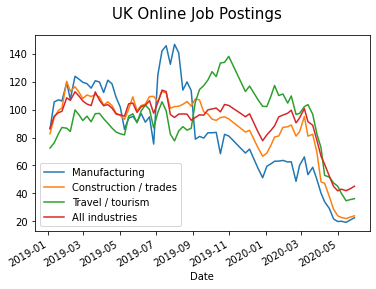

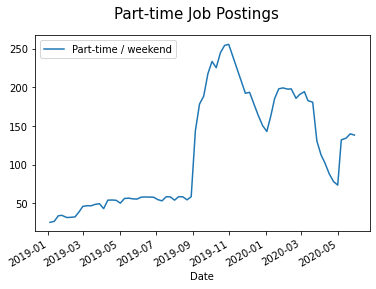

In [53]:
#Selection Jobs Columns
df = data.T
df = df.iloc[:,[0,1,3,7,22,30]]

#Set date as Datetie index and drop 'Date' string
df_time = pd.to_datetime(df.Date,dayfirst=True)
df = df.set_index(df_time)
# selection of columns ** exluding 0 = 'Date'
# Columns = 'Manufacturing', 'Construction / trades', 'Travel / tourism', 'Part-time / weekend', 'All industries'
df_select = df.iloc[:,[1,2,3,5]]
df_select = df_select.astype('float64')
print(df_select)

#plot selection

df_select.plot()
plt.suptitle("UK Online Job Postings", fontsize=15, fontweight=1, color='black')


plt.show()

df_parttime = df.iloc[:,[4]]
df_parttime = df_parttime.astype('float64')
df_parttime.plot()
plt.suptitle("Part-time Job Postings", fontsize=15, fontweight=1, color='black')
plt.show()


#df_select.axvline('2020-03-01', color="black",linewidth=0.5)


How long of a lag between job posting and job creation in employment data?
Best guess would be 2 months...need to do analysis

In [54]:
# UK Shipping data/chart

# Load Data
# Source: https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/weeklyshippingindicators
# Dataset updated on Thursday's

url = 'https://raw.githubusercontent.com/esheehan1/projects/master/shippingdatafinal.csv'
daily_shipping_data = pd.read_csv(url, skiprows=4, index_col=0).dropna()

print(daily_shipping_data)



      Week commencing  Unnamed: 2  ...  Unnamed: 16  Unnamed: 17
Week                               ...                          
14         01/04/2019      2298.0  ...        454.0         78.0
15         08/04/2019      2427.0  ...        506.0         57.0
16         15/04/2019      2475.0  ...        556.0         44.0
17         22/04/2019      2487.0  ...        549.0         85.0
18         29/04/2019      2246.0  ...        510.0         58.0
...               ...         ...  ...          ...          ...
18         27/04/2020      1952.0  ...        245.0         35.0
19         04/05/2020      2063.0  ...        284.0         34.0
20         11/05/2020      1985.0  ...        283.0         55.0
21         18/05/2020      2201.0  ...        255.0         22.0
22         25/05/2020      2389.0  ...        290.0         28.0

[61 rows x 17 columns]


      Week commencing  All UK
Week                         
14         01/04/2019  2298.0
15         08/04/2019  2427.0
16         15/04/2019  2475.0
17         22/04/2019  2487.0
18         29/04/2019  2246.0
                 All UK    5dMA
Week commencing                
01/04/2019       2298.0     NaN
08/04/2019       2427.0     NaN
15/04/2019       2475.0     NaN
22/04/2019       2487.0     NaN
29/04/2019       2246.0  2386.6


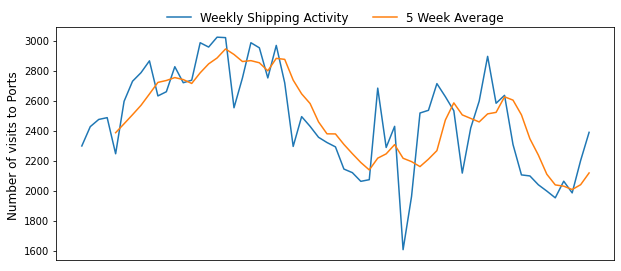

In [55]:
daily_shipping_data.rename(columns={'Unnamed: 2': 'All UK'}, inplace=True) #Rename column we need


daily_shipping_data = daily_shipping_data[['Week commencing', 'All UK']] #Filter
print(daily_shipping_data.head())

daily_shipping_data.set_index('Week commencing', inplace=True)
daily_shipping_data['5dMA'] = daily_shipping_data.rolling(5).mean()

print(daily_shipping_data.head())


register_matplotlib_converters()
fig,ax = plt.subplots(figsize=(10,4.3))
plt.plot(daily_shipping_data.index, daily_shipping_data['All UK'].values)
plt.plot(daily_shipping_data.index, daily_shipping_data['5dMA'].values)
plt.gca().xaxis.set_major_locator(mdates.DayLocator((1)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
#fig.autofmt_xdate(rotation=45)
plt.ylabel('Number of visits to Ports ', fontsize=12)
#ax.axvline('2020-03-01', color="black",linewidth=0.5)
plt.legend(['Weekly Shipping Activity', '5 Week Average'],
           loc='upper center', bbox_to_anchor=(0.5, 1.11), frameon=False, fontsize=12, ncol=6)

plt.show()